*Managerial Problem Solving*

# Tutorial 10 - Regression and Time Series Analysis

Toni Greif<br>
Lehrstuhl für Wirtschaftsinformatik und Informationsmanagement

SS 2019

In [1]:
library(tidyverse)
library(TTR)
library(forecast)

Warning message:
"package 'tidyverse' was built under R version 3.5.3"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.0     v purrr   0.2.5
v tibble  2.1.1     v dplyr   0.8.1
v tidyr   0.8.2     v stringr 1.3.1
v readr   1.1.1     v forcats 0.3.0
Warning message:
"package 'tibble' was built under R version 3.5.3"Warning message:
"package 'dplyr' was built under R version 3.5.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'TTR' was built under R version 3.5.3"Warning message:
"package 'forecast' was built under R version 3.5.3"

## Regression Analysis

Predict an economic quantity (=dependent variable) based on known and measurable influence factors (= independent
variables). This mathematical equation can be generalized as follows:


$$Y_i= b_0 + b_1 X_{1_i} + \epsilon_i$$

where, $b_0$ is the intercept and $b_1$ is the slope. Collectively, they are called regression coefficients. $\epsilon_i$ is the error term, the part of $Y_i$ the regression model is unable to explain.

The aim of this exercise is to build a simple regression model that we can use to predict Distance (dist) by establishing a statistically significant linear relationship with Speed (speed). The initial assumption of a linear relationship can be examined by means of a scatter plot.

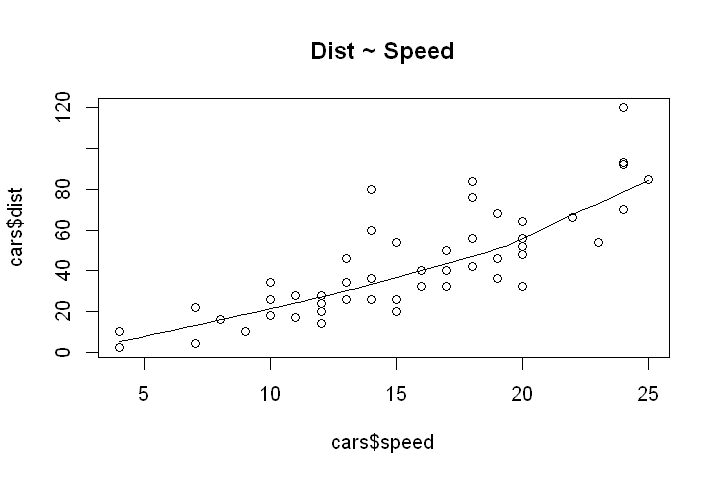

In [2]:
options(repr.plot.width=6, repr.plot.height=4)
scatter.smooth(x=cars$speed, y=cars$dist, main="Dist ~ Speed") 

To spot any outlier observations in the variable use boxplots. Having outliers in your predictor can drastically affect the predictions.

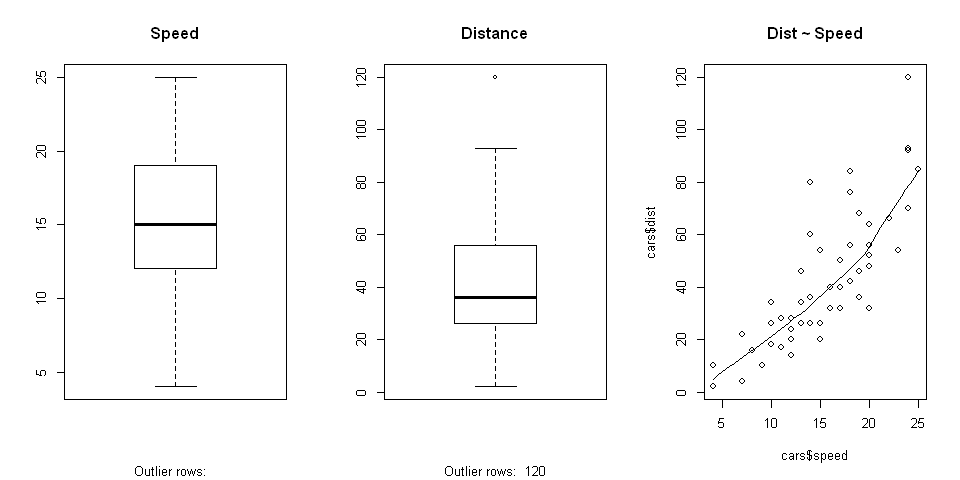

In [3]:
options(repr.plot.width=8, repr.plot.height=4)
par(mfrow=c(1, 3))
boxplot(cars$speed, main="Speed", sub=paste("Outlier rows: ", boxplot.stats(cars$speed)$out))
boxplot(cars$dist, main="Distance", sub=paste("Outlier rows: ", boxplot.stats(cars$dist)$out))
scatter.smooth(x=cars$speed, y=cars$dist, main="Dist ~ Speed")

Correlation is a statistical measure that suggests the level of linear dependence between two variables, that occur in pair.

Correlation can take values between -1 to +1. If we observe for every instance where speed increases, the distance also increases along with it, then there is a high positive correlation between them and therefore the correlation between them will be closer to 1. The opposite is true for an inverse relationship, in which case, the correlation between the variables will be close to -1.

[1] 0.8068949

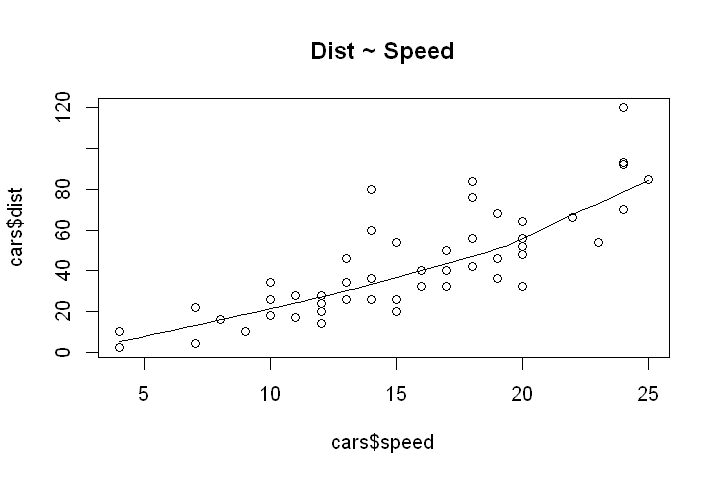

In [4]:
options(repr.plot.width=6, repr.plot.height=4)
cor(cars$speed, cars$dist)
scatter.smooth(x=cars$speed, y=cars$dist, main="Dist ~ Speed") 

Now that we have seen the linear relationship graphically in the scatter plot and by computing the correlation, lets build the the linear model.

In [5]:
linearMod <- lm(dist ~ speed, data=cars)


### Results of Regression Analysis

**Information on model quality:**
- Standard error (SE)
    - Information on the deviation of the model from the data
- Pearson correlation coefficient $(R)$
    - Magnitude of linear correlation $(-1 \leq R \leq 1)$
- Coefficient of determination $(R^2)$
    - Characterizes the 'predictive power' of the model
    
**Intercept and slope of regression function (Regression coefficients)**

**Confidence intervals**
- Interval in which the true regression coefficient value lies with a probability of 95%
    - If 0 is covered by the interval, the coefficient is not statistically significant
    - The same information is conveyed by the coefficients’ p-values (p-value < 0.05)


In [6]:
summary(linearMod)


Call:
lm(formula = dist ~ speed, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
speed         3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


**Pr(>|t|) or p-value** is the probability that you get a t-value as high or higher than the observed value when the Null Hypothesis (the coefficient is equal to zero or that there is no relationship) is true. 

- Pr(>|t|) is low, the coefficients are significant (significantly different from zero)
- Pr(>|t|) is high, the coefficients are not significant
- p-value is less than significance level (< 0.05), we can reject the null hypothesis

- t-tests that can assess only one regression coefficient at a time
- F-test can assess multiple coefficients simultaneously.

**The F-test of the overall significance** is a specific form of the F-test. It compares a model with no predictors to the model that you specify. The hypotheses for the F-test of the overall significance are as follows:

- Null hypothesis: The fit of the intercept-only model and your model are equal.
- Alternative hypothesis: The fit of the intercept-only model is significantly reduced compared to your model.

**The R-Squared value** of the new bigger model will always be greater than that of the smaller subset, ss you add more variables to your model, This is because, since all the variables in the original model is also present, their contribution to explain the dependent variable will be present in the super-set as well.

The adjusted R-Squared penalizes total value for the number of terms in your model.

### Exercise

Load the dataset “income.csv”.

In [7]:
income <- read.csv("data/T09/income.csv")
income %>% head()

Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
3615,3624,2.1,69.05,15.1,41.3,20,50708
365,6315,1.5,69.31,11.3,66.7,152,566432
2212,4530,1.8,70.55,7.8,58.1,15,113417
2110,3378,1.9,70.66,10.1,39.9,65,51945
21198,5114,1.1,71.71,10.3,62.6,20,156361
2541,4884,0.7,72.06,6.8,63.9,166,103766


Perform a multiple linear regression. Therefore, use the income as dependent variable and all others parameters as independent variables.


In [8]:
fit1a <- lm(Income ~ ., data=income)
summary(fit1a)


Call:
lm(formula = Income ~ ., data = income)

Residuals:
    Min      1Q  Median      3Q     Max 
-899.73 -226.98  -53.63  232.37  966.02 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  3.183e+03  6.980e+03   0.456   0.6508  
Population   3.999e-02  1.808e-02   2.212   0.0325 *
Illiteracy  -1.437e+02  2.302e+02  -0.624   0.5359  
Life.Exp    -8.688e+00  9.739e+01  -0.089   0.9293  
Murder      -1.154e+01  4.151e+01  -0.278   0.7823  
HS.Grad      3.417e+01  1.455e+01   2.349   0.0236 *
Frost        1.916e-01  2.061e+00   0.093   0.9264  
Area         1.662e-03  1.021e-03   1.627   0.1111  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 470.1 on 42 degrees of freedom
Multiple R-squared:  0.4983,	Adjusted R-squared:  0.4146 
F-statistic: 5.958 on 7 and 42 DF,  p-value: 7.485e-05


After fitting the initial model, keep removing the insignificant (5%) independent variables.What independent variables have a significant influence on the life expectancy of the state inhabitants?

In [9]:
# - Life.Exp
fit1a <- lm(Income ~ Population + 
                    Illiteracy + Murder + HS.Grad + 
                    Frost + Area, data=income)
summary(fit1a)

# - Frost
fit1a <- lm(Income ~ Population + 
                    Illiteracy + Murder + HS.Grad + 
                    Area, data=income)
summary(fit1a)

# Murder
fit1a <- lm(Income ~ Population + 
                    Illiteracy + HS.Grad + 
                    Area, data=income)
summary(fit1a)

# - Illiteracy
fit1a <- lm(Income ~ Population + 
                    HS.Grad + 
                    Area, data=income)
summary(fit1a)

# Area
fit1a <- lm(Income ~ Population + 
                    HS.Grad, data=income)
summary(fit1a)


Call:
lm(formula = Income ~ Population + Illiteracy + Murder + HS.Grad + 
    Frost + Area, data = income)

Residuals:
    Min      1Q  Median      3Q     Max 
-906.99 -219.42  -59.47  231.33  968.55 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  2.567e+03  1.018e+03   2.522   0.0155 *
Population   3.954e-02  1.718e-02   2.301   0.0263 *
Illiteracy  -1.440e+02  2.275e+02  -0.633   0.5301  
Murder      -8.929e+00  2.906e+01  -0.307   0.7601  
HS.Grad      3.375e+01  1.361e+01   2.480   0.0171 *
Frost        2.414e-01  1.961e+00   0.123   0.9026  
Area         1.663e-03  1.009e-03   1.648   0.1067  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 464.7 on 43 degrees of freedom
Multiple R-squared:  0.4982,	Adjusted R-squared:  0.4281 
F-statistic: 7.114 on 6 and 43 DF,  p-value: 2.617e-05



Call:
lm(formula = Income ~ Population + Illiteracy + Murder + HS.Grad + 
    Area, data = income)

Residuals:
    Min      1Q  Median      3Q     Max 
-905.01 -219.80  -60.24  232.74  965.49 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  2.641e+03  8.109e+02   3.257  0.00217 **
Population   3.885e-02  1.605e-02   2.421  0.01969 * 
Illiteracy  -1.605e+02  1.815e+02  -0.884  0.38124   
Murder      -9.291e+00  2.858e+01  -0.325  0.74666   
HS.Grad      3.325e+01  1.284e+01   2.590  0.01295 * 
Area         1.701e-03  9.499e-04   1.791  0.08019 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 459.4 on 44 degrees of freedom
Multiple R-squared:  0.498,	Adjusted R-squared:  0.4409 
F-statistic: 8.729 on 5 and 44 DF,  p-value: 8.236e-06



Call:
lm(formula = Income ~ Population + Illiteracy + HS.Grad + Area, 
    data = income)

Residuals:
    Min      1Q  Median      3Q     Max 
-912.18 -216.28  -61.89  217.13  947.96 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  2.577e+03  7.788e+02   3.309  0.00185 **
Population   3.684e-02  1.466e-02   2.513  0.01563 * 
Illiteracy  -1.900e+02  1.557e+02  -1.220  0.22889   
HS.Grad      3.411e+01  1.244e+01   2.742  0.00873 **
Area         1.601e-03  8.895e-04   1.800  0.07860 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 454.9 on 45 degrees of freedom
Multiple R-squared:  0.4968,	Adjusted R-squared:  0.452 
F-statistic: 11.11 on 4 and 45 DF,  p-value: 2.372e-06



Call:
lm(formula = Income ~ Population + HS.Grad + Area, data = income)

Residuals:
    Min      1Q  Median      3Q     Max 
-956.47 -225.60  -14.54  198.88  974.12 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.807e+03  4.581e+02   3.944 0.000272 ***
Population  3.620e-02  1.473e-02   2.458 0.017820 *  
HS.Grad     4.508e+01  8.634e+00   5.221 4.17e-06 ***
Area        1.150e-03  8.135e-04   1.414 0.164049    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 457.3 on 46 degrees of freedom
Multiple R-squared:  0.4801,	Adjusted R-squared:  0.4462 
F-statistic: 14.16 on 3 and 46 DF,  p-value: 1.137e-06



Call:
lm(formula = Income ~ Population + HS.Grad, data = income)

Residuals:
    Min      1Q  Median      3Q     Max 
-998.14 -237.26  -43.64  202.88 1355.74 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.664e+03  4.516e+02   3.685 0.000591 ***
Population  3.743e-02  1.486e-02   2.519 0.015237 *  
HS.Grad     4.920e+01  8.213e+00   5.990 2.78e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 462.1 on 47 degrees of freedom
Multiple R-squared:  0.4575,	Adjusted R-squared:  0.4345 
F-statistic: 19.82 on 2 and 47 DF,  p-value: 5.723e-07


What share of total variance in the data can be explained by our regression model?

In [10]:
#Adjusted R-squared:  0.4345

## Time Series Analysis 

<img src="images/timeSeries.png" style="width:80%; float:center">

Source: http://statmath.wu.ac.at/courses/mmwi-finmath/Aufbaukurs/handouts/handout-7-Zerlegung.pdf


The file dax.csv provides the monthly closing prices of the DAX index since November 1990. Load the csv-file.

In [11]:
dax_data <- read.csv("data/T10/dax.csv")
dax_data %>% head()

x
<dbl>
1398.2
1420.1
1542.1
1522.8
1605.8
1704.1


Create a time series object. Be sure to use the correct frequency as well as the start data.

In [12]:
dax <- dax_data %>%
        ts(start = c(1990, 11), frequency = 12)

dax

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1990,,,,,,,,,,,1398.20,1420.10
1991,1542.10,1522.80,1605.80,1704.10,1622.20,1622.30,1650.50,1607.00,1582.10,1566.60,1578.00,1687.50
1992,1745.10,1717.90,1734.00,1803.20,1752.60,1615.40,1541.30,1466.40,1492.30,1544.30,1545.10,1571.90
1993,1684.40,1684.20,1627.20,1631.90,1697.60,1803.20,1944.90,1915.70,2069.00,2057.80,2266.70,2177.50
1994,2091.60,2133.10,2246.00,2127.70,2025.30,2146.60,2212.90,2011.80,2071.60,2048.30,2106.60,2021.30
1995,2102.20,1922.60,2015.90,2092.20,2083.90,2218.70,2238.30,2187.00,2167.90,2242.80,2253.90,2470.10
1996,2473.60,2485.90,2505.30,2542.80,2561.40,2473.40,2543.80,2651.90,2659.30,2845.50,2888.70,3035.20
1997,3259.60,3429.10,3438.10,3562.70,3766.90,4405.50,3919.80,4154.90,3753.70,3972.10,4224.30,4442.50
1998,4693.90,5097.30,5107.44,5569.08,5897.44,5873.92,4833.89,4474.51,4671.12,5022.70,5002.39,5159.96
1999,4911.81,4884.20,5393.11,5069.83,5378.52,5101.87,5270.77,5149.83,5525.40,5896.04,6958.14,6835.60


### Simple Average

In [13]:
SA <- mean(dax_data$x)
SA

[1] 5465.247

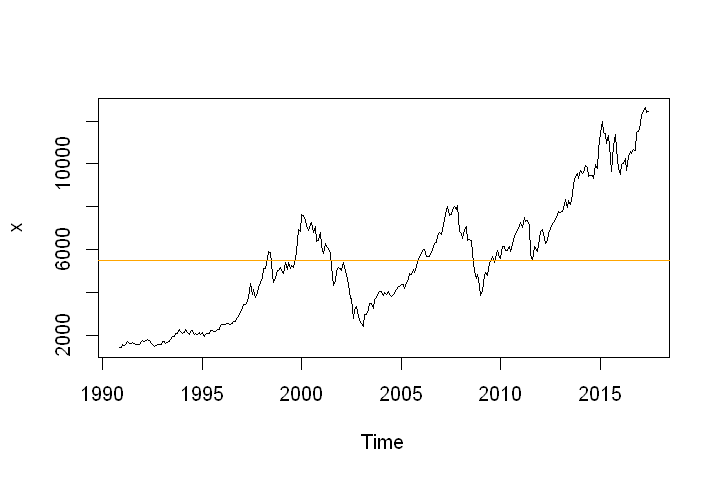

In [14]:
options(repr.plot.width=6, repr.plot.height=4)
plot(dax)
abline(h =SA, col = "orange")

### Moving Average

Calculate the moving average with 3, 10, 20 and 100 averaging periods. Visualize the DAX index as well as the moving averages in one plot using different colors. 


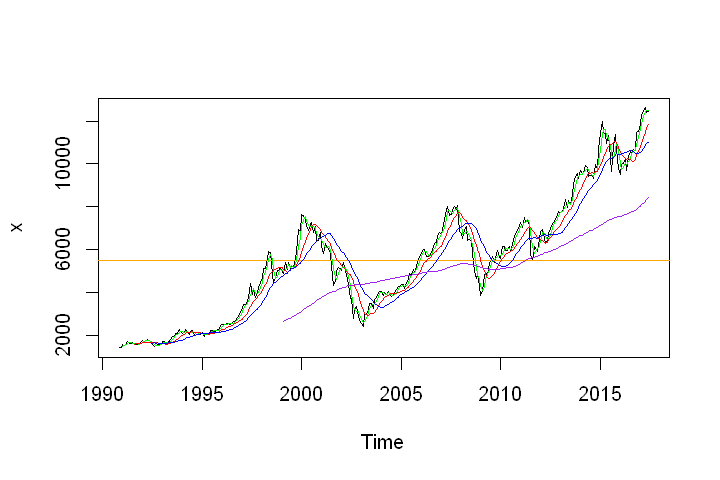

In [15]:
options(repr.plot.width=6, repr.plot.height=4)

MA3 <- SMA(dax, 3)
MA10 <- SMA(dax, 10)
MA20 <- SMA(dax, 20)
MA100 <- SMA(dax, 100)

plot(dax)
abline(h =SA, col = "orange")
lines(MA3, col = "green")
lines(MA10, col = "red")
lines(MA20, col = "blue")
lines(MA100, col ="purple")

### Weighted moving average

Using the weighted moving average, the sliding window values are given different weights, typically so that more recent points matter more.

In [16]:
n= 3
WMA10 <- WMA(dax, n = n, wts = c(0.6,0.3,0.1))

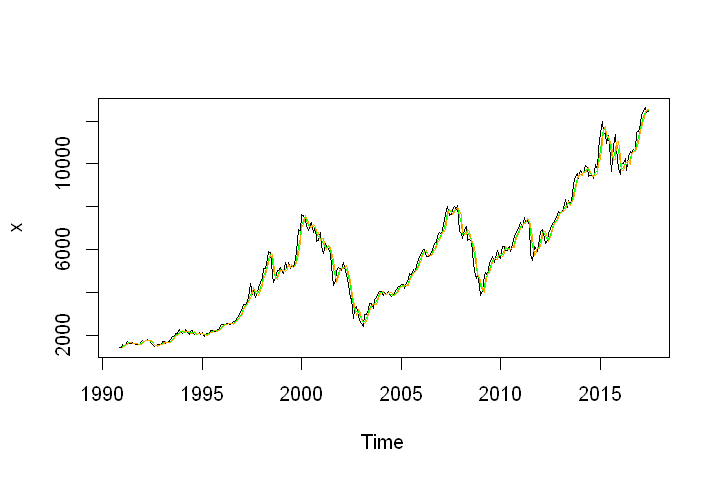

In [17]:
options(repr.plot.width=6, repr.plot.height=4)
plot(dax)
lines(MA3, col = "green")
lines(WMA10, col ="orange")

### Single Exponential Smoothing
Here is where things get interesting. Imagine a weighted average where we consider all of the data points, while assigning exponentially smaller weights as we go back in time. For example if we started with 0.9, our weights would be (going back in time):

- 0.91,0.92,0.93,0.94,0.95,0.96,...
- 0.9,0.81,0.729,0.6561,0.59049,0.531441,...

In some way this is very similar to the weighted average above, only the weights are decaying uniformly. The smaller the starting weight, the faster it approaches zero.

But there is a problem: weights do not add up to 1.
We are solving this with a succinct and elegant formula:
$$\hat{Y}_{t}=\alpha Y_t+(1−\alpha)\hat{Y}_{t−1}$$

For details see: https://grisha.org/blog/2016/01/29/triple-exponential-smoothing-forecasting/

Determine the components of the DAX time series (trend, seasonality, random) and visualize them. 

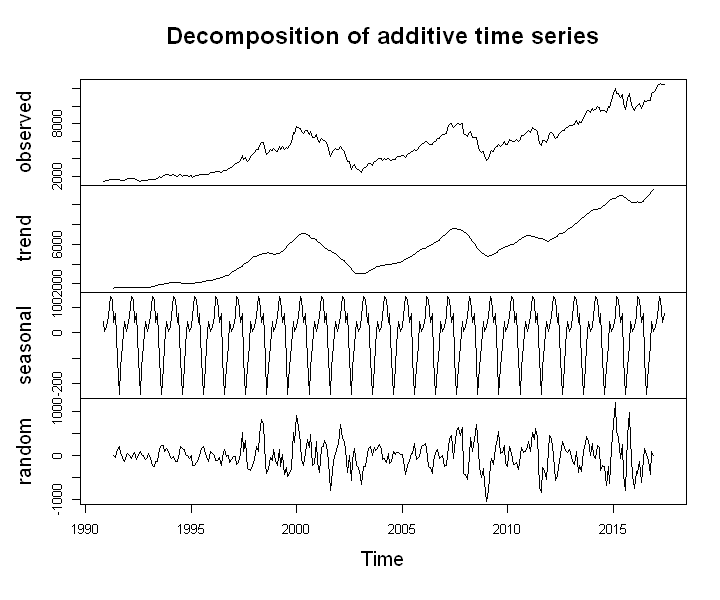

In [18]:
options(repr.plot.width=6, repr.plot.height=5)
dax_decompose <- decompose(dax)
plot(dax_decompose)

Which months are good / bad for stock investors in Germany?

In [19]:
dax_decompose$seasonal

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1990,,,,,,,,,,,43.612867,4.989188
1991,23.281402,65.972495,144.654274,132.862799,42.272824,75.577270,-104.327115,-241.751465,-136.018342,-51.126198,43.612867,4.989188
1992,23.281402,65.972495,144.654274,132.862799,42.272824,75.577270,-104.327115,-241.751465,-136.018342,-51.126198,43.612867,4.989188
1993,23.281402,65.972495,144.654274,132.862799,42.272824,75.577270,-104.327115,-241.751465,-136.018342,-51.126198,43.612867,4.989188
1994,23.281402,65.972495,144.654274,132.862799,42.272824,75.577270,-104.327115,-241.751465,-136.018342,-51.126198,43.612867,4.989188
1995,23.281402,65.972495,144.654274,132.862799,42.272824,75.577270,-104.327115,-241.751465,-136.018342,-51.126198,43.612867,4.989188
1996,23.281402,65.972495,144.654274,132.862799,42.272824,75.577270,-104.327115,-241.751465,-136.018342,-51.126198,43.612867,4.989188
1997,23.281402,65.972495,144.654274,132.862799,42.272824,75.577270,-104.327115,-241.751465,-136.018342,-51.126198,43.612867,4.989188
1998,23.281402,65.972495,144.654274,132.862799,42.272824,75.577270,-104.327115,-241.751465,-136.018342,-51.126198,43.612867,4.989188
1999,23.281402,65.972495,144.654274,132.862799,42.272824,75.577270,-104.327115,-241.751465,-136.018342,-51.126198,43.612867,4.989188


### Holt-Winters model

The idea behind Holt-Winters model is exponential smoothing applied to both expected value, trend and seasonal effects.

Use the data above to predict the future stock market. Create an additive Holt-Winters model to predict the DAX. 

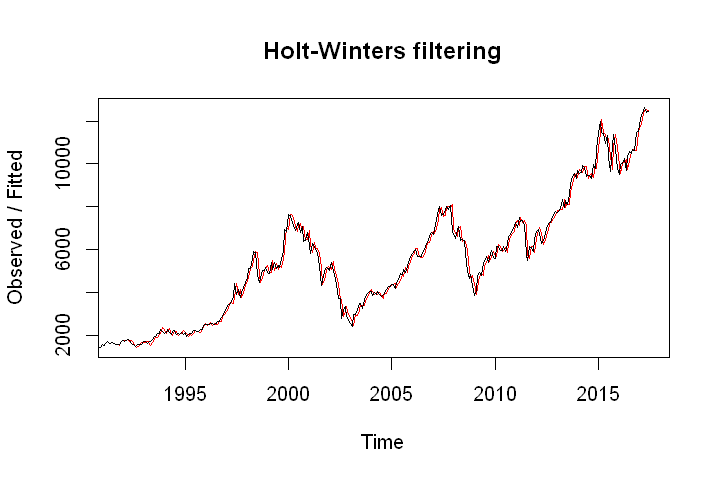

In [20]:
options(repr.plot.width=6, repr.plot.height=4)
additiveModel = HoltWinters(dax, seasonal = "additive")
plot(additiveModel)

Use the model to predict the index for the next 4 years and visualize it.

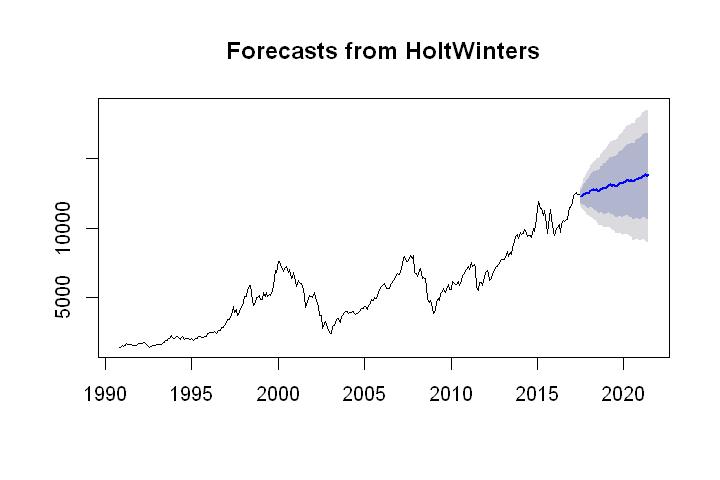

In [21]:
options(repr.plot.width=6, repr.plot.height=4)
DAXForecast = forecast(additiveModel,h=48)
plot(DAXForecast)

A  multiple time series is returned with columns fit, lower and upper for the prediction intervals and the lower and upper bounds respectively.